## Problem Statement: House Price Prediction

### To find out the various factors that influences a home buyer to buy their dream house or the main factors that contribute to the SalePrice of a house.

In [1]:
#Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from datetime import date
from sklearn.model_selection import train_test_split

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

### 1. Load the data

In [2]:
class HPP:
    def __init__(self):
        pass
    def datacleaning():
        # findMissingColumns
        #
        pass
    def EDA():
        pass
    def model_building():
        pass
    def model_evaluation():
        pass
# a bacis structure of the HPP code    

In [3]:
# houseData = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
# houseTest = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

houseData = pd.read_csv("../Dataset/train.csv")
houseTest = pd.read_csv("../Dataset/test.csv")

In [4]:
#Checking train dataset info
houseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#Checking test dataset info
houseTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

### 2. Data Exploration and Cleaning

In [6]:
class DataCleaning:
    
    def __init__(self,data):
        self.data = data
    @staticmethod
    def findMissingColumns(testDf, trainDf):
        """
        Function to find the missing columns in the test dataset compared to the train dataset.

        Args:
        testDf (pandas DataFrame): Test dataset.
        trainDf (pandas DataFrame): Train dataset.

        Returns:
        set: Set of missing columns in the test dataset.
        """
        testColumns = set(testDf.columns)
        trainColumns = set(trainDf.columns)
        missingColumns = trainColumns.difference(testColumns)
        print("Missing columns :" + str(missingColumns))

    
    
    def removeUniqueValueColumns(self):
        """
        Removes columns from the DataFrame that have unique values.

        Args:
        data (pandas DataFrame): Input DataFrame.

        Returns:
        pandas DataFrame: DataFrame with columns having unique values removed.
        """
        original_shape = self.data.shape
        data = self.data.loc[:, self.data.nunique() != 1]
        new_shape = self.data.shape
        print(f"Removed {original_shape[1] - new_shape[1]} columns with unique values.")
        
    
    def missingDataPercentage(self):
        """
        Calculates the percentage of missing values for each column in the DataFrame and prints the result.

        Args:
        df (pandas DataFrame): Input DataFrame.

        Returns:
        None
        """
        missing_data = self.data[self.data.columns[self.data.isnull().any()]].isna().sum()
        percentage_missing = (missing_data / len(self.data)) * 100
        print("Percentage of missing values for each column:")
        print(percentage_missing)
            
    def dropColumnsWithMostNulls(self):
        """
        Drops columns with the most number of null or missing values from the DataFrame.

        Args:
        data (pandas DataFrame): Input DataFrame.
        Returns:
        pandas DataFrame: DataFrame with specified columns dropped.
        """
        columns_to_drop = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'LotFrontage', 'Utilities']
        self.data = self.data.drop(columns_to_drop, axis=1)
#     
    def column_dataQuality(self, column):
        """
        Provides information about the quality of data in a specific column of a DataFrame.

        Args:
        data (pandas DataFrame): Input DataFrame.
        column (str): Name of the column to analyze.

        Returns:
        None
        """
        # Unique values in the column
        print("Unique values:")
        print(self.data[column].unique(), '\n')

        # Percentage of null values in the column
        null_percentage = self.data[column].isna().sum() * 100 / len(self.data[column])
        print("Null value percentage:", null_percentage, "%\n")

        # Descriptive statistics of the column
        print("Column description:")
        print(self.data[column].describe())
        
    def drop_duplicates(self):
        self.data.drop_duplicates(inplace=True)
        print("If there are duplicates values , they have dropped")
        
    def impute_categorical_data(self, categorical_columns):
        """
        Imputes missing values for categorical features in the DataFrame based on the mode.

        Args:
        data (pandas DataFrame): Input DataFrame.
        categorical_columns (list): List of column names representing categorical features.

        Returns:
        pandas DataFrame: DataFrame with missing values imputed for categorical features.
        """
        for column in categorical_columns:
            self.data[column].fillna(self.data[column].mode()[0], inplace=True)
            
    def imputeNumericData(self):
        """
        Imputes missing values in numerical columns with the median.

        Args:
        data (pandas DataFrame): Input DataFrame.

        Returns:
        pandas DataFrame: DataFrame with missing values imputed.
        """
        numeric_columns = self.data.select_dtypes(include=np.number).columns.tolist()
        for column in numeric_columns:
            self.data[column].fillna(self.data[column].median(), inplace=True)
    


In [7]:
cleanTrain = DataCleaning(houseData)
cleanTest = DataCleaning(houseTest)

In [8]:
DataCleaning.findMissingColumns(houseTest, houseData)

Missing columns :{'SalePrice'}


In [9]:
DataCleaning.findMissingColumns(houseTest, houseData)

Missing columns :{'SalePrice'}


In [10]:
cleanTrain.removeUniqueValueColumns()

Removed 0 columns with unique values.


In [11]:
# cleanTest.removeUniqueValueColumns()

In [12]:
#Remove any rows with duplicate data
len(cleanTrain.data) - len(cleanTrain.data.drop_duplicates())

0

In [13]:
cleanTrain.findMissingColumns(houseTest, houseData)

Missing columns :{'SalePrice'}


In [14]:
print("For houseData:")
cleanTrain.missingDataPercentage()

# Calculate and print missing data percentages for houseTest
print("\nFor houseTest:")
cleanTest.missingDataPercentage()

For houseData:
Percentage of missing values for each column:
LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

For houseTest:
Percentage of missing values for each column:
MSZoning         0.274160
LotFrontage     15.558602
Alley           92.666210
Utilities        0.137080
Exterior1st      0.068540
Exterior2nd      0.068540
MasVnrType       1.096642
MasVnrArea       1.028101
BsmtQual         3.015764
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtFinType1     2.878684
BsmtFinSF1       0.068540
BsmtFinType2     2.878684
Bsmt

In [15]:
# Drop columns with the most null or missing values from houseData
cleanTrain.dropColumnsWithMostNulls()

# Calculate and print missing data percentages for the updated houseData
print("Missing data percentages for the updated houseData:")
cleanTrain.missingDataPercentage()

Missing data percentages for the updated houseData:
Percentage of missing values for each column:
MasVnrType      0.547945
MasVnrArea      0.547945
BsmtQual        2.534247
BsmtCond        2.534247
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtFinType2    2.602740
Electrical      0.068493
GarageType      5.547945
GarageYrBlt     5.547945
GarageFinish    5.547945
GarageQual      5.547945
GarageCond      5.547945
dtype: float64


In [16]:
#Similarly for test dataset, dropping columns with most missing values.
cleanTest.dropColumnsWithMostNulls()
print("\n Missing data percentages for the updated houseTrain:")
cleanTest.missingDataPercentage()


 Missing data percentages for the updated houseTrain:
Percentage of missing values for each column:
MSZoning        0.274160
Exterior1st     0.068540
Exterior2nd     0.068540
MasVnrType      1.096642
MasVnrArea      1.028101
BsmtQual        3.015764
BsmtCond        3.084304
BsmtExposure    3.015764
BsmtFinType1    2.878684
BsmtFinSF1      0.068540
BsmtFinType2    2.878684
BsmtFinSF2      0.068540
BsmtUnfSF       0.068540
TotalBsmtSF     0.068540
BsmtFullBath    0.137080
BsmtHalfBath    0.137080
KitchenQual     0.068540
Functional      0.137080
GarageType      5.209047
GarageYrBlt     5.346127
GarageFinish    5.346127
GarageCars      0.068540
GarageArea      0.068540
GarageQual      5.346127
GarageCond      5.346127
SaleType        0.068540
dtype: float64


In [17]:
cleanTrain.data.shape

(1460, 74)

In [18]:
cleanTest.data.shape

(1459, 73)

In [19]:
DataCleaning.findMissingColumns(houseTest,houseData)

Missing columns :{'SalePrice'}


In [20]:
# Imputing missing values for categorical features
categorical_columns = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 
                       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'Electrical']
cleanTrain.impute_categorical_data(categorical_columns)
cleanTest.impute_categorical_data(categorical_columns)

In [21]:
# Check for the total count of null values in houseTest
total_null_values = cleanTest.data.isnull().sum().sum()
print("Total count of null values in houseTest:", total_null_values)

# Calculate and print missing data percentages for houseTest
print("Missing data percentages for houseTest:")
cleanTest.missingDataPercentage()

Total count of null values in houseTest: 113
Missing data percentages for houseTest:
Percentage of missing values for each column:
MSZoning        0.274160
Exterior1st     0.068540
Exterior2nd     0.068540
MasVnrArea      1.028101
BsmtFinSF1      0.068540
BsmtFinSF2      0.068540
BsmtUnfSF       0.068540
TotalBsmtSF     0.068540
BsmtFullBath    0.137080
BsmtHalfBath    0.137080
KitchenQual     0.068540
Functional      0.137080
GarageYrBlt     5.346127
GarageCars      0.068540
GarageArea      0.068540
SaleType        0.068540
dtype: float64


In [22]:
cleanTrain.missingDataPercentage()

Percentage of missing values for each column:
MasVnrArea     0.547945
GarageYrBlt    5.547945
dtype: float64


In [23]:
cleanTest.missingDataPercentage()

Percentage of missing values for each column:
MSZoning        0.274160
Exterior1st     0.068540
Exterior2nd     0.068540
MasVnrArea      1.028101
BsmtFinSF1      0.068540
BsmtFinSF2      0.068540
BsmtUnfSF       0.068540
TotalBsmtSF     0.068540
BsmtFullBath    0.137080
BsmtHalfBath    0.137080
KitchenQual     0.068540
Functional      0.137080
GarageYrBlt     5.346127
GarageCars      0.068540
GarageArea      0.068540
SaleType        0.068540
dtype: float64


In [24]:
# Impute missing values in numerical columns for houseData
cleanTrain.imputeNumericData()

# Impute missing values in numerical columns for houseTest
cleanTest.imputeNumericData()

In [25]:
cleanTrain.missingDataPercentage()

Percentage of missing values for each column:
Series([], dtype: float64)


In [26]:
cleanTest.missingDataPercentage()

Percentage of missing values for each column:
MSZoning       0.27416
Exterior1st    0.06854
Exterior2nd    0.06854
KitchenQual    0.06854
Functional     0.13708
SaleType       0.06854
dtype: float64


In [27]:
houseData = cleanTrain.data
houseTest = cleanTest.data

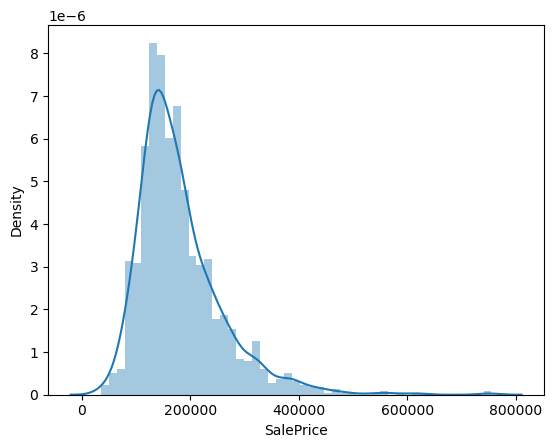

In [28]:
# plot showing distribution of target variable in train dataset.
sns.distplot(houseData['SalePrice'])
plt.show()

In [29]:
#-------------------------------------------------------------------------""

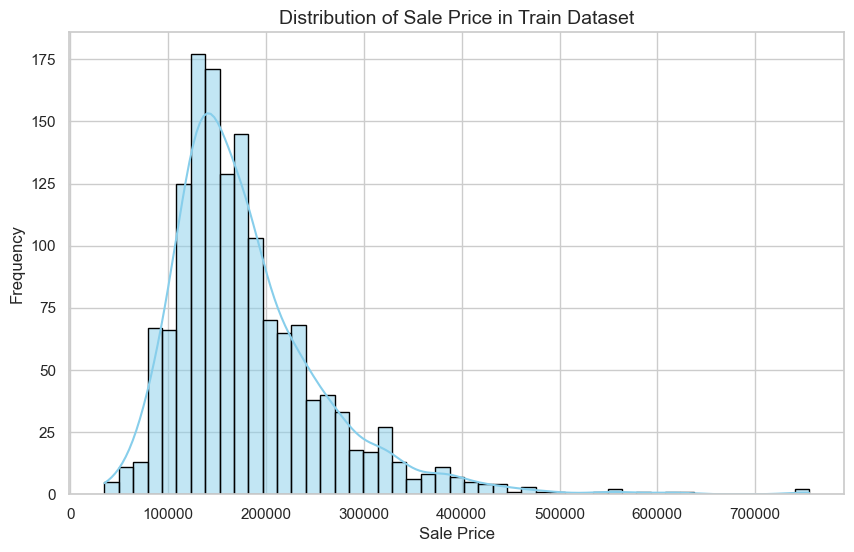

In [30]:
# Set the style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(houseData['SalePrice'], kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Sale Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Sale Price in Train Dataset', fontsize=14)

# Show plot
plt.show()

In [31]:
houseData['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [32]:

#Finding correlations of all features or predictor variables against the SalePrice or target varianle.
def correlationHouseData(df):
    corr_houseData=df.corr()['SalePrice']
    return corr_houseData
# #sorting correlations of predictor and target variables in descending order.
# correlation_houseData(houseData).sort_values(ascending=False)

In [33]:
#Checking how the numerical data of the dataset is distributed (before doing any outlier treatment)
houseData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1460.0,103.117123,180.731373,0.0,0.00,0.0,164.25,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


#### The predictor variable 'overall Quality, has the highest correlation towards the sale price of a house
#### Comparing overall Quality of the house with the other top 6 parametes to see how they are scattered

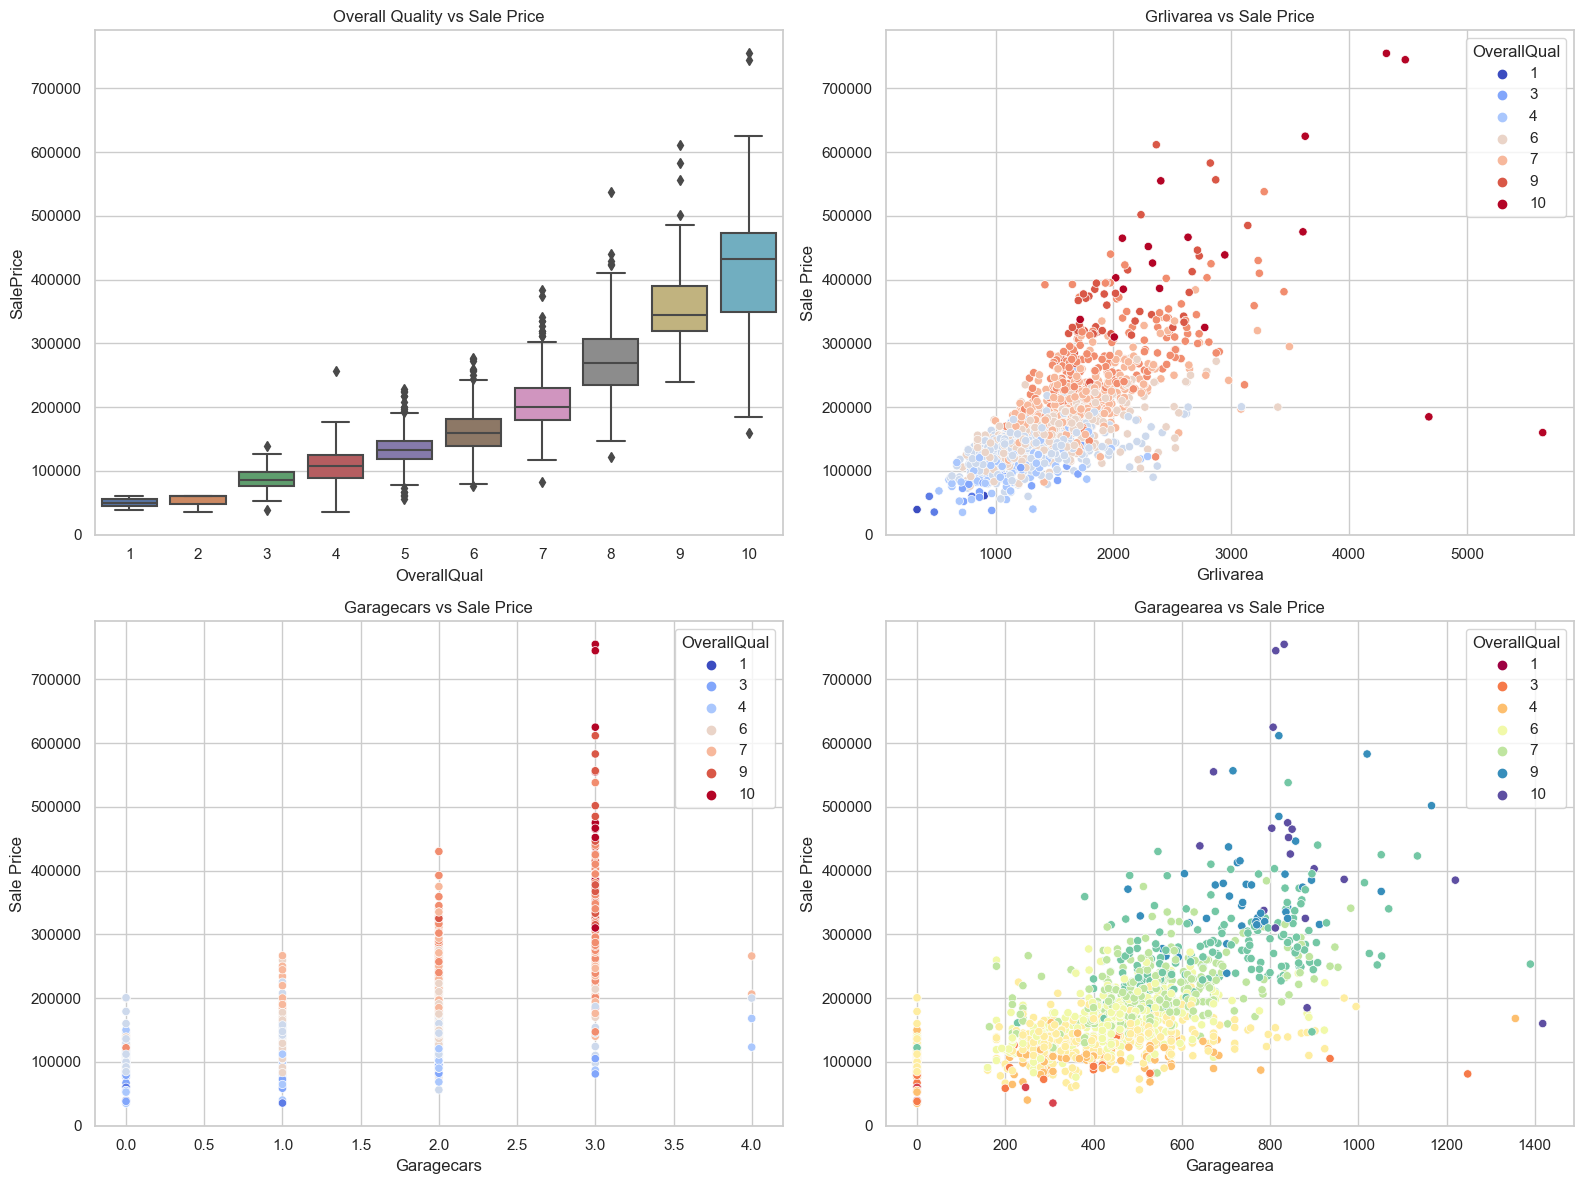

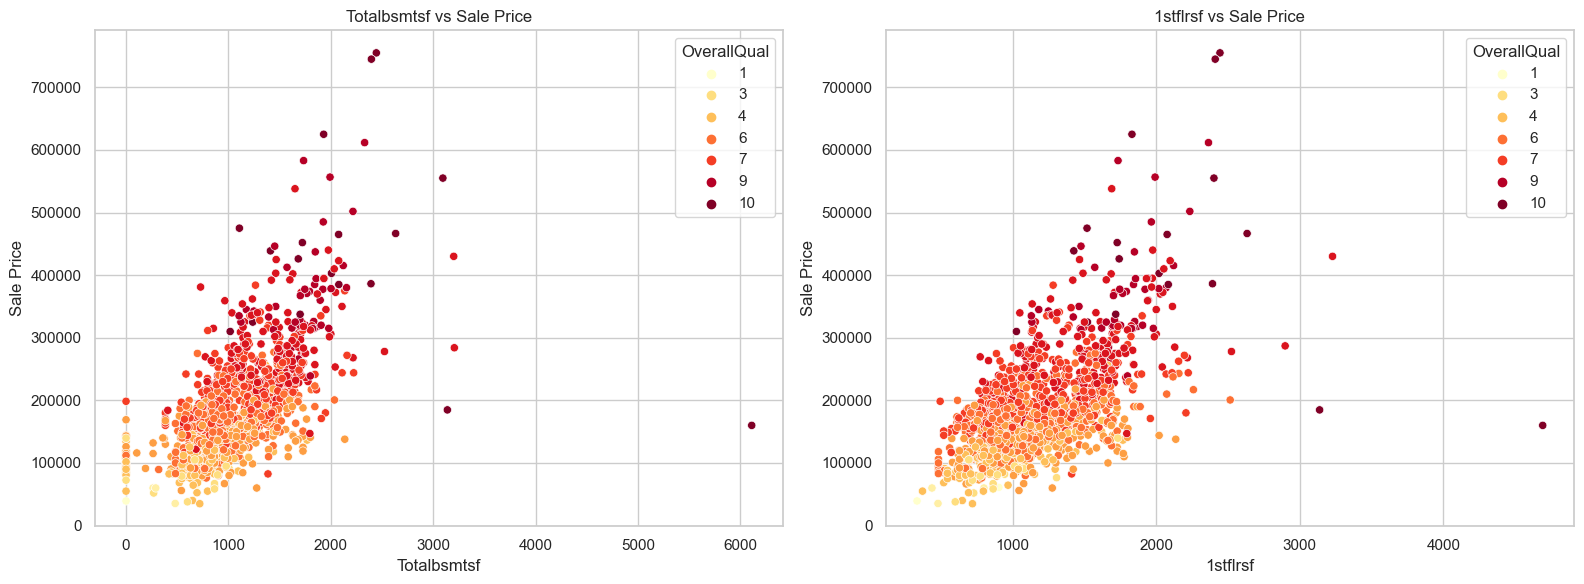

In [34]:


# Function to make scatter plots more engaging
def make_scatter_plot(ax, x, y, hue, palette):
    sns.scatterplot(x=x, y=y, hue=hue, palette=palette, ax=ax)
    ax.set_xlabel(x.name.capitalize())  # Set x-axis label
    ax.set_ylabel('Sale Price')  # Set y-axis label
    ax.set_title(f'{x.name.capitalize()} vs Sale Price')  # Set plot title

# Creating the figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Box plot OverallQual vs SalePrice
sns.boxplot(x='OverallQual', y='SalePrice', data=houseData, ax=axs[0, 0])
axs[0, 0].set_title('Overall Quality vs Sale Price')

# GrLivArea vs SalePrice plot
make_scatter_plot(axs[0, 1], houseData.GrLivArea, houseData.SalePrice, houseData.OverallQual, 'coolwarm')

# GarageCars vs SalePrice plot
make_scatter_plot(axs[1, 0], houseData.GarageCars, houseData.SalePrice, houseData.OverallQual, 'coolwarm')

# GarageArea vs SalePrice plot
make_scatter_plot(axs[1, 1], houseData.GarageArea, houseData.SalePrice, houseData.OverallQual, 'Spectral')

plt.tight_layout()
plt.show()

# Creating another figure for the next set of scatter plots
fig2, axs2 = plt.subplots(1, 2, figsize=(16, 6))

# TotalBsmtSF vs SalePrice plot
make_scatter_plot(axs2[0], houseData.TotalBsmtSF, houseData.SalePrice, houseData.OverallQual, 'YlOrRd')

# 1stFlrSF vs SalePrice plot
make_scatter_plot(axs2[1], houseData['1stFlrSF'], houseData.SalePrice, houseData.OverallQual, 'YlOrRd')

plt.tight_layout()
plt.show()


#### We could see that SalePrice of some houses with high living area are under 200000, which contradictory as high living area generally directly correlates to high house prices.
#### Hence removing those rows.

In [35]:
# Drop rows based on condition
houseData = houseData.drop(houseData[(houseData.GrLivArea > 5000) & (houseData.SalePrice < 200000)].index)

# Print the shape of the DataFrame after dropping rows
print("Shape of houseData after dropping rows:", houseData.shape)

Shape of houseData after dropping rows: (1459, 74)


In [36]:
houseTest.shape

(1459, 73)

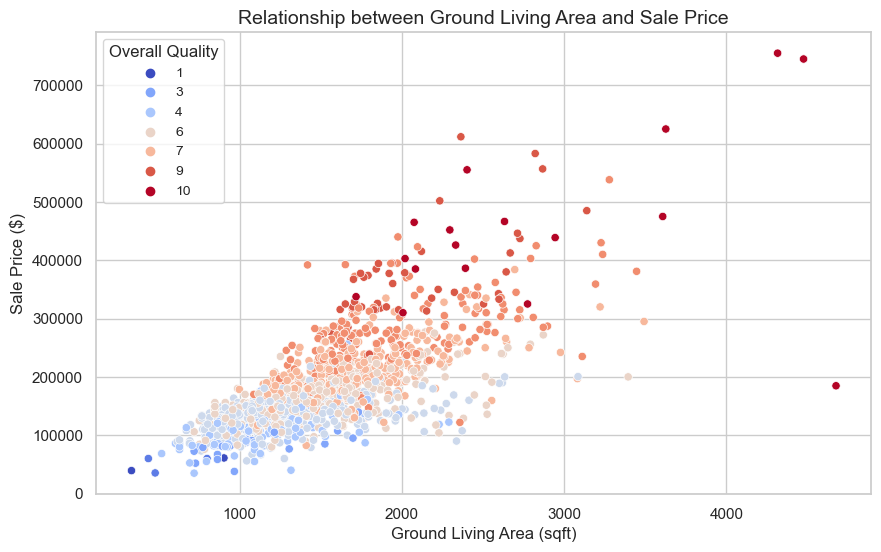

In [37]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=houseData.GrLivArea, y=houseData.SalePrice, hue=houseData.OverallQual, palette='coolwarm')
plt.xlabel('Ground Living Area (sqft)', fontsize=12)
plt.ylabel('Sale Price ($)', fontsize=12)
plt.title('Relationship between Ground Living Area and Sale Price', fontsize=14)
plt.legend(title='Overall Quality', fontsize=10)


In [38]:
# Get the current year
today = date.today()
currYear = today.year

# Calculate the age of the houses
houseData['age'] = currYear - houseData['YearBuilt']
houseTest['age'] = currYear - houseTest['YearBuilt']

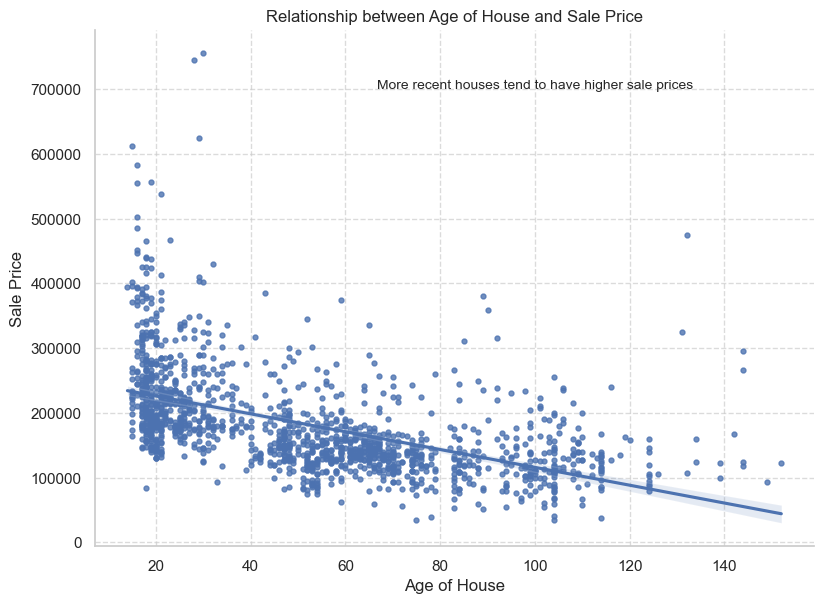

In [39]:
# Plot Age versus SalePrice with seaborn
sns.set(style="whitegrid")  # Set the style

# Create the lmplot
sns.lmplot(y='SalePrice', x='age', data=houseData, markers='.', aspect=1.4, height=6, scatter_kws={"s": 50})

# Add title and labels
plt.title('Relationship between Age of House and Sale Price')
plt.xlabel('Age of House')
plt.ylabel('Sale Price')

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Add text annotation
plt.text(100, 700000, 'More recent houses tend to have higher sale prices', fontsize=10, ha='center')

# Show the plot
plt.show()

### From above plot, we can clearly see that newer the house, higher the price is. 

In [40]:
houseData.shape

(1459, 75)

In [41]:
def findCategoricalColumns(dataframe):
    """
    Find categorical columns in the dataframe.

    Parameters:
    dataframe (DataFrame): The input dataframe.

    Returns:
    list: A list of categorical column names.
    """
    categorical_columns = dataframe.select_dtypes(include=['object']).columns.tolist()
    print("Number of categorical columns:", len(categorical_columns))
    return categorical_columns

# For the train dataset
categorical_cols_train = findCategoricalColumns(houseData)


Number of categorical columns: 37


In [42]:
houseData[categorical_cols_train].nunique()
for column in categorical_cols_train:
    houseData[column] = houseData[column].astype('category')

In [43]:
#for test dataset
categorical_cols_test = findCategoricalColumns(houseTest)
    
for column in categorical_cols_test:
    houseTest[column] = houseTest[column].astype('category')

Number of categorical columns: 37


In [44]:
#checking datatypes of variables in test dataset
houseTest.dtypes

Id                  int64
MSSubClass          int64
MSZoning         category
LotArea             int64
Street           category
                   ...   
MoSold              int64
YrSold              int64
SaleType         category
SaleCondition    category
age                 int64
Length: 74, dtype: object

In [45]:
#checking datatypes of variables in train dataset
houseData.dtypes

Id                  int64
MSSubClass          int64
MSZoning         category
LotArea             int64
Street           category
                   ...   
YrSold              int64
SaleType         category
SaleCondition    category
SalePrice           int64
age                 int64
Length: 75, dtype: object

In [46]:
houseData.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch

In [47]:
#Encoding all categorical variables in train dataset to numerical using label encoder technique. 
for column in categorical_cols_train:
    houseData[column]=houseData[column].cat.codes
houseData.head()
    

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,age
0,1,60,3,8450,1,3,3,4,0,5,...,0,0,0,0,2,2008,8,4,208500,21
1,2,20,3,9600,1,3,3,2,0,24,...,0,0,0,0,5,2007,8,4,181500,48
2,3,60,3,11250,1,0,3,4,0,5,...,0,0,0,0,9,2008,8,4,223500,23
3,4,70,3,9550,1,0,3,0,0,6,...,0,0,0,0,2,2006,8,0,140000,109
4,5,60,3,14260,1,0,3,2,0,15,...,0,0,0,0,12,2008,8,4,250000,24


In [48]:
#Encoding all categorical variables in test dataset to numerical using label encoder technique. 
for column in categorical_cols_test:
    houseTest[column]=houseTest[column].cat.codes
houseTest.head()
 


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,age
0,1461,20,2,11622,1,3,3,4,0,12,...,0,0,120,0,0,6,2010,8,4,63
1,1462,20,3,14267,1,0,3,0,0,12,...,0,0,0,0,12500,6,2010,8,4,66
2,1463,60,3,13830,1,0,3,4,0,8,...,0,0,0,0,0,3,2010,8,4,27
3,1464,60,3,9978,1,0,3,4,0,8,...,0,0,0,0,0,6,2010,8,4,26
4,1465,120,3,5005,1,0,1,4,0,22,...,0,0,144,0,0,1,2010,8,4,32


In [49]:
# correlation_house_Data(houseData).sort_values(ascending=False)
houseData.shape,houseTest.shape

((1459, 75), (1459, 74))

### 3. Data Preparation for model building 

In [50]:
# split into X and y
X = houseData.drop(['SalePrice'], axis=1)
y= houseData['SalePrice']
X.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,age
0,1,60,3,8450,1,3,3,4,0,5,...,0,0,0,0,0,2,2008,8,4,21
1,2,20,3,9600,1,3,3,2,0,24,...,0,0,0,0,0,5,2007,8,4,48
2,3,60,3,11250,1,0,3,4,0,5,...,0,0,0,0,0,9,2008,8,4,23
3,4,70,3,9550,1,0,3,0,0,6,...,272,0,0,0,0,2,2006,8,0,109
4,5,60,3,14260,1,0,3,2,0,15,...,0,0,0,0,0,12,2008,8,4,24


In [51]:
X.shape

(1459, 74)

In [52]:
y.shape

(1459,)

In [53]:
#Importing all required libraries for model bulding
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

### 4. Model Building and Prediction

In [54]:
# Lasso Regression
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1))

# ElasticNet Regression
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

# Kernel Ridge Regression
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

# Gradient Boosting Regression
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state=5)

# XGBoost Regression
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state=7, nthread=-1)

# LightGBM Regression
model_lgb = lgb.LGBMRegressor(objective='regression', num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin=55, bagging_fraction=0.8,
                              bagging_freq=5, feature_fraction=0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf=6, min_sum_hessian_in_leaf=11)

In [55]:
# Number of folds for cross-validation
n_folds = 10

In [56]:
def rmsleCv(model):
    """
    Calculates the Root Mean Squared Logarithmic Error (RMSLE) using cross-validation.

    Parameters:
    - model: The machine learning model for which RMSLE is calculated.

    Returns:
    - rmse: Array of RMSE values calculated from cross-validation.
    """

    # Initialize KFold cross-validation with shuffling
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X.values)
    
    # Calculate RMSE using cross-validation
    rmse = np.sqrt(-cross_val_score(model, X.values, y.values, scoring="neg_mean_squared_error", cv=kf))
    
    return rmse


#### Lasso and ElasticNet score obtained without stacking different Algorithms. 

In [57]:
score = rmsleCv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 29364.3815 (6841.3196)



In [58]:
score = rmsleCv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 29363.0146 (6839.7091)



In [59]:
score = rmsleCv(KRR)
print(" Kernel Ridge Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Kernel Ridge Regression score: 183021.6661 (90813.8112)



In [60]:
score = rmsleCv(GBoost)
print("Gradient Boosting Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting Regression: 25546.7255 (7207.8448)



In [61]:
score = rmsleCv(model_xgb)
print("XGBoost Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

XGBoost Regression: 25655.0217 (8939.3146)



In [62]:
score = rmsleCv(model_lgb)
print("LightGBM Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

#### rmse score should always be minimum as it's the square of error score. Hence low value of rmse score means our prediction is closer to actual value.

Next, we can further reduce the rmse score by ensemble method i.e by stacking 3 differnt models using 3 differnt algorithms and creating a metamodel.

This metamodel inturn can be used for prediction.

In [63]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    """
    Stacking Averaged Models is an ensemble learning technique that combines multiple base models
    with a meta-model to improve prediction performance.

    Parameters:
    - base_models: A list of base models to be stacked.
    - meta_model: The meta-model that combines the predictions of the base models.
    - n_folds: Number of folds for cross-validation.
    """
    
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    def fit(self, X, y):
        """
        Fit the StackingAveragedModels on the training data.

        Parameters:
        - X: Training features.
        - y: Target values.

        Returns:
        - self: Fitted model.
        """

        # Initialize lists to store clones of base models and meta-model
        self.base_models_ = [list() for _ in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models and create out-of-fold predictions
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                # Clone the base model
                instance = clone(model)
                self.base_models_[i].append(instance)
                
                # Fit the base model to the training data
                instance.fit(X[train_index], y[train_index])
                
                # Make predictions on the holdout fold
                y_pred = instance.predict(X[holdout_index])
                
                # Save the predictions for the holdout fold
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Train the meta-model using the out-of-fold predictions
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    def predict(self, X):
        """
        Make predictions using the fitted StackingAveragedModels.

        Parameters:
        - X: Test features.

        Returns:
        - predictions: Predicted target values.
        """
        
        # Generate meta-features by averaging predictions of base models
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_])
        
        # Use the meta-model to make final predictions
        predictions = self.meta_model_.predict(meta_features)
        return predictions

In [64]:
# Create an instance of StackingAveragedModels with base models and meta model
stacked_averaged_models = StackingAveragedModels(base_models=(ENet, GBoost, KRR, model_xgb, model_lgb),
                                                 meta_model=lasso)

# Evaluate the performance of the stacked model using cross-validation
score = rmsleCv(stacked_averaged_models)

# Print the mean and standard deviation of the RMSLE score
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))


[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

In [65]:
X.values

array([[1.000e+00, 6.000e+01, 3.000e+00, ..., 8.000e+00, 4.000e+00,
        2.100e+01],
       [2.000e+00, 2.000e+01, 3.000e+00, ..., 8.000e+00, 4.000e+00,
        4.800e+01],
       [3.000e+00, 6.000e+01, 3.000e+00, ..., 8.000e+00, 4.000e+00,
        2.300e+01],
       ...,
       [1.458e+03, 7.000e+01, 3.000e+00, ..., 8.000e+00, 4.000e+00,
        8.300e+01],
       [1.459e+03, 2.000e+01, 3.000e+00, ..., 8.000e+00, 4.000e+00,
        7.400e+01],
       [1.460e+03, 2.000e+01, 3.000e+00, ..., 8.000e+00, 4.000e+00,
        5.900e+01]])

In [66]:
# Fit the StackingAveragedModels instance to the training data
stacked_averaged_models.fit(X.values, y.values)

# Use the fitted model to make predictions on the test data
stacked_pred = stacked_averaged_models.predict(houseTest.values)


[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

In [67]:
from joblib import dump

# Specify the file path where you want to save the model
model_filename = 'stacked_averaged_models.pkl'

# Save the model to disk
dump(stacked_averaged_models, model_filename)

print("Model saved successfully as", model_filename)


Model saved successfully as stacked_averaged_models.pkl


### We can see that by using stacking technique we have now brought down the error score to a lower value than earlier, which inturn means our prediction is closer to the Actual SalePrice of the house. 

In [68]:
len(stacked_pred)

1459

In [69]:
houseTest['SalePrice'] = stacked_pred

In [70]:
houseTest

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,age,SalePrice
0,1461,20,2,11622,1,3,3,4,0,12,...,0,120,0,0,6,2010,8,4,63,120090.898784
1,1462,20,3,14267,1,0,3,0,0,12,...,0,0,0,12500,6,2010,8,4,66,156501.419473
2,1463,60,3,13830,1,0,3,4,0,8,...,0,0,0,0,3,2010,8,4,27,183535.441111
3,1464,60,3,9978,1,0,3,4,0,8,...,0,0,0,0,6,2010,8,4,26,194477.764730
4,1465,120,3,5005,1,0,1,4,0,22,...,0,144,0,0,1,2010,8,4,32,187320.633696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,4,1936,1,3,3,4,0,10,...,0,0,0,0,6,2006,8,4,54,80566.989805
1455,2916,160,4,1894,1,3,3,4,0,10,...,0,0,0,0,4,2006,8,0,54,77084.468615
1456,2917,20,3,20000,1,3,3,4,0,11,...,0,0,0,0,9,2006,8,0,64,163401.866119
1457,2918,85,3,10441,1,3,3,4,0,11,...,0,0,0,700,7,2006,8,4,32,119989.731963


In [71]:
Submission=houseTest[['Id', 'SalePrice']]
Submission.to_csv('submission.csv', index=None)

In [72]:
# Create a DataFrame for submission containing 'Id' and 'SalePrice' columns
submission = houseTest[['Id', 'SalePrice']]

# Save the submission DataFrame to a CSV file
submission.to_csv('submission.csv', index=None)

# Print a confirmation message
print("Submission saved successfully as submission.csv")


Submission saved successfully as submission.csv


In [73]:
python --version


NameError: name 'python' is not defined